
# Customer Segmentation by Banking Sample Dataset
* Banking | Marketing | Leads Conversion Data: https://www.kaggle.com/arashnic/banking-loan-prediction

### Load libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey
import plotly.express as px
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import pickle
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from time import time
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from sklearn.svm import SVC

### Test Dataset

In [2]:
df_test = pd.read_csv(r'C:\Users\Acer\OneDrive - DigiPen Institute of Technology\Desktop\work\Weekly Summary\Banking and Leads Conversion/test_loan/test.csv', delimiter=',')
print(f'There are {df_test.shape[0]} rows and {df_test.shape[1]} columns')

There are 30037 rows and 21 columns


In [3]:
df_test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


## Integrate with Macro Economic Dataset

In [4]:
df_eco = pd.read_csv('combined_data.csv').drop('Unnamed: 0', axis=1)
df_eco.head()

,quarter,cpi_val,gdp_val,ppi_val,hdbpi_val,rental_val
0,2004-Q1,76.887667,47011.4,80.3,75.3,64.0
1,2004-Q2,77.058333,47431.6,80.4,76.2,64.0
2,2004-Q3,77.184000,49234.5,80.7,76.3,64.2
3,2004-Q4,77.411667,50562.7,81.3,77.1,64.6
4,2005-Q1,77.681000,51062.3,81.9,77.2,65.2


In [5]:
quarters = df_eco.quarter.tolist()
quarters[:5]

['2004-Q1', '2004-Q2', '2004-Q3', '2004-Q4', '2005-Q1']

In [6]:
test=df_test.copy()
test["quarter"] = np.random.choice(quarters, size=test.shape[0])
test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,quarter
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4,2013-Q3
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7,2018-Q3
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,2009-Q2
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,N,S133,C,0.0,NaN,NaN,NaN,NaN,0,2016-Q4
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0,2005-Q2


In [7]:
comb = test.merge(df_eco, on='quarter',how='outer')
comb.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Loan_Period,Interest_Rate,EMI,Var1,quarter,cpi_val,gdp_val,ppi_val,hdbpi_val,rental_val
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,3.0,20.0,372.0,4,2013-Q3,92.916,96743.3,154.6,148.1,118.2
1,APPB40882474103,Female,08/03/86,02/07/16,C10127,C,COM0007938,B,4.0,1902.4,...,NaN,NaN,NaN,0,2013-Q3,92.916,96743.3,154.6,148.1,118.2
2,APPR60514036704,Female,14/12/89,05/07/16,C10002,A,COM0002475,B,4.0,3500.0,...,NaN,NaN,NaN,10,2013-Q3,92.916,96743.3,154.6,148.1,118.2
3,APPY20169747403,Male,12/07/86,05/07/16,C10007,A,COM0000034,C,1.0,3500.0,...,5.0,NaN,NaN,10,2013-Q3,92.916,96743.3,154.6,148.1,118.2
4,APPA90060573227,Female,31/07/92,06/07/16,C10005,A,COM0003122,B,4.0,1560.0,...,NaN,NaN,NaN,0,2013-Q3,92.916,96743.3,154.6,148.1,118.2


In [8]:
comb.isna().sum()

ID                                         0
Gender                                     0
DOB                                        3
Lead_Creation_Date                         0
City_Code                                314
City_Category                            314
Employer_Code                           1605
Employer_Category1                      1605
Employer_Category2                      1695
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     4037
Primary_Bank_Type                       4037
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              32
Loan_Amount                            11871
Loan_Period                            11871
Interest_Rate                          20385
EMI                                    20385
Var1                                       0
quarter                                    0
cpi_val   

### Train Dataset

In [9]:
df_train = pd.read_csv(r'C:\Users\Acer\OneDrive - DigiPen Institute of Technology\Desktop\work\Weekly Summary\Banking and Leads Conversion/train_loan/train.csv', delimiter=',')
print(f'There are {df_train.shape[0]} rows and {df_train.shape[1]} columns')

There are 69713 rows and 22 columns


In [10]:
df_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


## Integrate with Macro Economic Dataset

In [11]:
train=df_train.copy()
train["quarter"] = np.random.choice(quarters, size=train.shape[0])
train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,quarter
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,S122,G,0.0,NaN,NaN,NaN,NaN,0,0,2013-Q1
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,2011-Q4
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0,2019-Q2
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0,2015-Q2
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0,2008-Q4


In [12]:
com_train = train.merge(df_eco, on='quarter',how='outer')
com_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Interest_Rate,EMI,Var1,Approved,quarter,cpi_val,gdp_val,ppi_val,hdbpi_val,rental_val
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,NaN,NaN,0,0,2013-Q1,92.245667,94352.7,152.4,148.6,117.6
1,APPM30977401211,Male,03/03/77,02/07/16,C10003,A,COM0010626,A,4.0,2500.0,...,20.00,1749.0,7,0,2013-Q1,92.245667,94352.7,152.4,148.6,117.6
2,APPU50442961628,Male,25/04/85,01/07/16,C10001,A,COM0000163,C,4.0,4000.0,...,14.85,1693.0,7,0,2013-Q1,92.245667,94352.7,152.4,148.6,117.6
3,APPC40718711428,Male,26/03/87,01/07/16,C10003,A,COM0011908,A,4.0,3000.0,...,NaN,NaN,7,0,2013-Q1,92.245667,94352.7,152.4,148.6,117.6
4,APPJ60678719543,Male,16/09/86,01/07/16,C10004,A,COM0000008,A,1.0,8000.0,...,13.99,2326.0,10,0,2013-Q1,92.245667,94352.7,152.4,148.6,117.6


In [13]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [14]:
df_train.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

<AxesSubplot:>

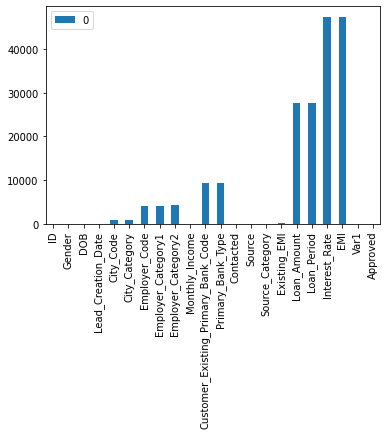

In [15]:
missed = pd.DataFrame(df_train.isna().sum())

missed.plot(kind='bar')

In [16]:
df_test.isna().sum()

ID                                         0
Gender                                     0
DOB                                        3
Lead_Creation_Date                         0
City_Code                                314
City_Category                            314
Employer_Code                           1605
Employer_Category1                      1605
Employer_Category2                      1695
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     4037
Primary_Bank_Type                       4037
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              32
Loan_Amount                            11871
Loan_Period                            11871
Interest_Rate                          20385
EMI                                    20385
Var1                                       0
dtype: int64

In [17]:
com_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [18]:
com_train.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
quarter   

### Train Target Approved Cases Distribution

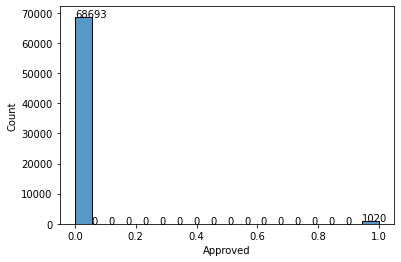

In [19]:
ax = sns.histplot(df_train['Approved'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

Loan amount median value: 30000.0


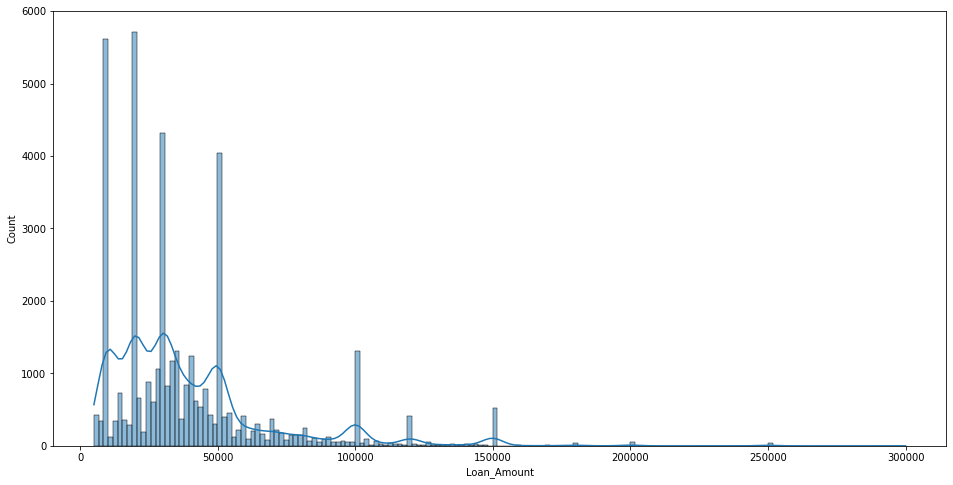

In [20]:
#Loan Amount Distribution
plt.figure(figsize=(16,8))
sns.histplot(df_train.Loan_Amount, kde=True)
print(f'Loan amount median value: {df_train.Loan_Amount.median()}')

Loan period median value: 4.0


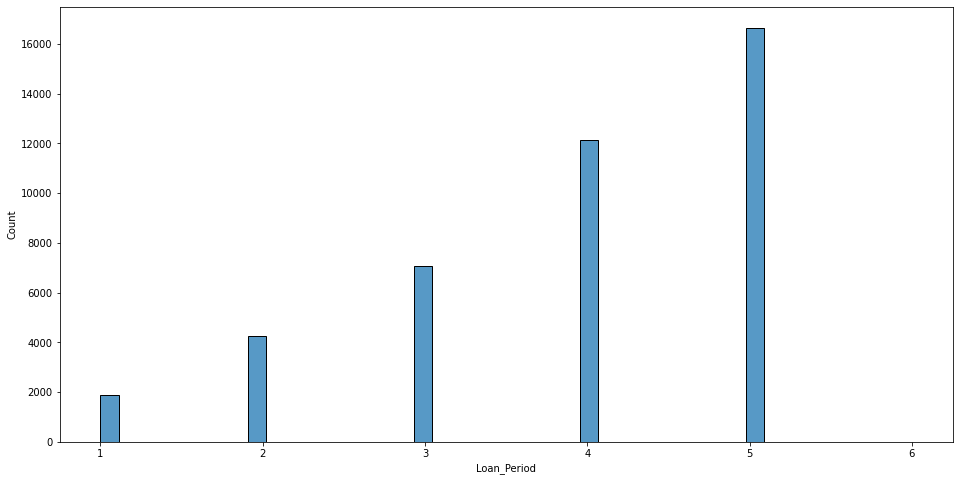

In [21]:
#Loan Amount Distribution
plt.figure(figsize=(16,8))
sns.histplot(df_train.Loan_Period)
print(f'Loan period median value: {df_train.Loan_Period.median()}')

Interest median value: 18.0


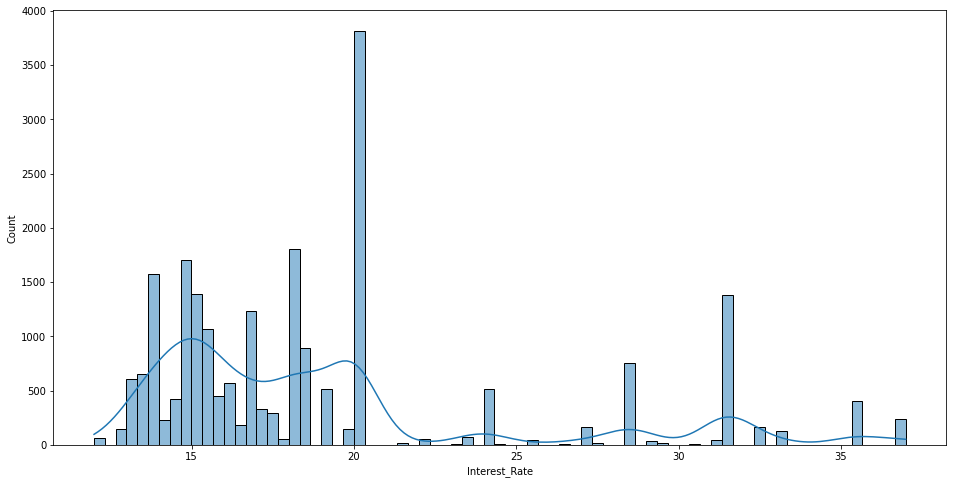

In [22]:
#Interest Rate Distribution
plt.figure(figsize=(16,8))
sns.histplot(df_train.Interest_Rate, kde=True)
print(f'Interest median value: {df_train.Interest_Rate.median()}')

EMI median value: 941.0


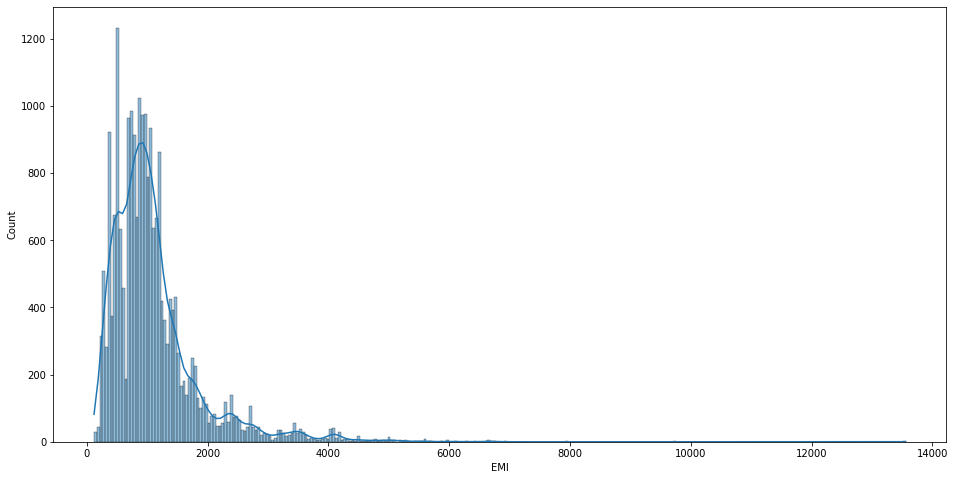

In [23]:
#EMI Distribution
plt.figure(figsize=(16,8))
sns.histplot(df_train.EMI, kde=True)
print(f'EMI median value: {df_train.EMI.median()}')

### Preprocessing:
* Fillin missing datas, can also drop missing datas in order to make mode more precise
* Encode categorical data to label
* Normalization
* Train test split


In [24]:
# Imputation:
## Categorical missing values are filled with mode() data
## Numerical missing values are filled with median() data

def impute_miss(df):
    for col in df.columns:         # imputation with either median or mode depending on number of unique entries in each column
        if df[col].dtype==object:
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df[col].fillna(df[col].median(),inplace=True)
    return df
cleaned_train = df_train.copy()
cleaned_train = impute_miss(cleaned_train)
cleaned_train.isna().sum()

ID                                     0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
dtype: int64

In [25]:
#filled missing values for train data integrated with macro eco data
eco_train = com_train.copy()
eco_train = impute_miss(eco_train)
eco_train.isna().sum()

ID                                     0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
quarter                                0
cpi_val                                0
gdp_val         

In [26]:
cleaned_train['Var1'].unique()

array([ 0, 10,  7,  4,  2], dtype=int64)

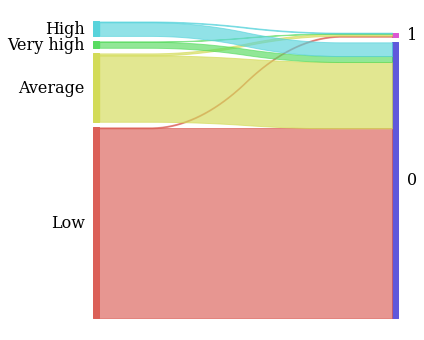

In [118]:
# sankey data visualization example

bins=[0,3000,6000,9000,12000]
group=['Low','Average','High','Very high']
temp=df_train.copy()
temp['Income_bin']=pd.cut(temp['Monthly_Income'],bins,labels=group)
# Income_bin=pd.crosstab(train['Income_bin'],train['Approved'])
# Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
# plt.xlabel('Monthly Income Tier')
# plt.ylabel('Normalized')
temp['Income_bin'].fillna(temp['Income_bin'].mode()[0], inplace=True)
# sankey.sankey(left=temp['Income_bin'], right=temp['Approved'], aspect=20,
#     fontsize=16, figure_name='Income to approved cases')
# sankey.sankey(left=temp['Var1'], right=temp['Approved'], aspect=20,
#     fontsize=16, figure_name='Var1 to approved cases')

income_var1 = pd.concat([temp['Income_bin'],temp['Var1']], axis=0)
var1_app = pd.concat([temp['Var1'],temp['Approved']], axis=0)

sankey.sankey(left=temp['Income_bin'], right=temp['Approved'], aspect=20,
    fontsize=16, figure_name='income to approved cases')

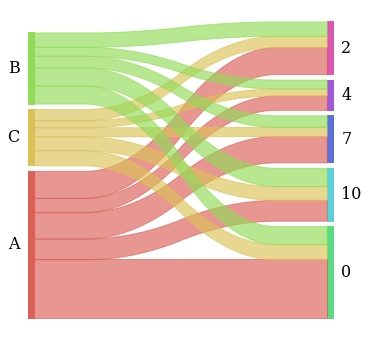

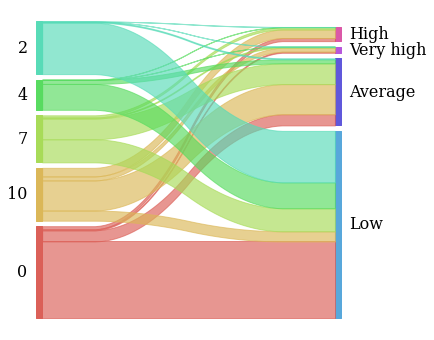

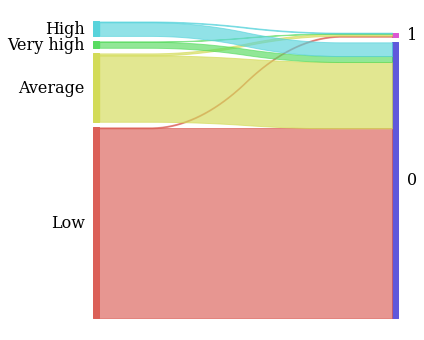

In [119]:

temp = df_train.copy()
bins=[0,3000,6000,9000,12000]
group=['Low','Average','High','Very high']
temp['Income_bin']=pd.cut(temp['Monthly_Income'],bins,labels=group)
temp['Income_bin'].fillna(temp['Income_bin'].mode()[0], inplace=True)
temp['Employer_Category1'].fillna(temp['Employer_Category1'].mode()[0], inplace=True)
sankey.sankey(left=temp['Employer_Category1'], right=temp['Var1'], aspect=20,
    fontsize=16, figure_name='EC1 to approved cases')

sankey.sankey(left=temp['Var1'], right=temp['Income_bin'], aspect=20,
    fontsize=16, figure_name='EC1 to approved cases')

sankey.sankey(left=temp['Income_bin'], right=temp['Approved'], aspect=20,
    fontsize=16, figure_name='EC1 to approved cases')

## Overview of approved cases with different interest_rate, loan amount, loan period and monthly income

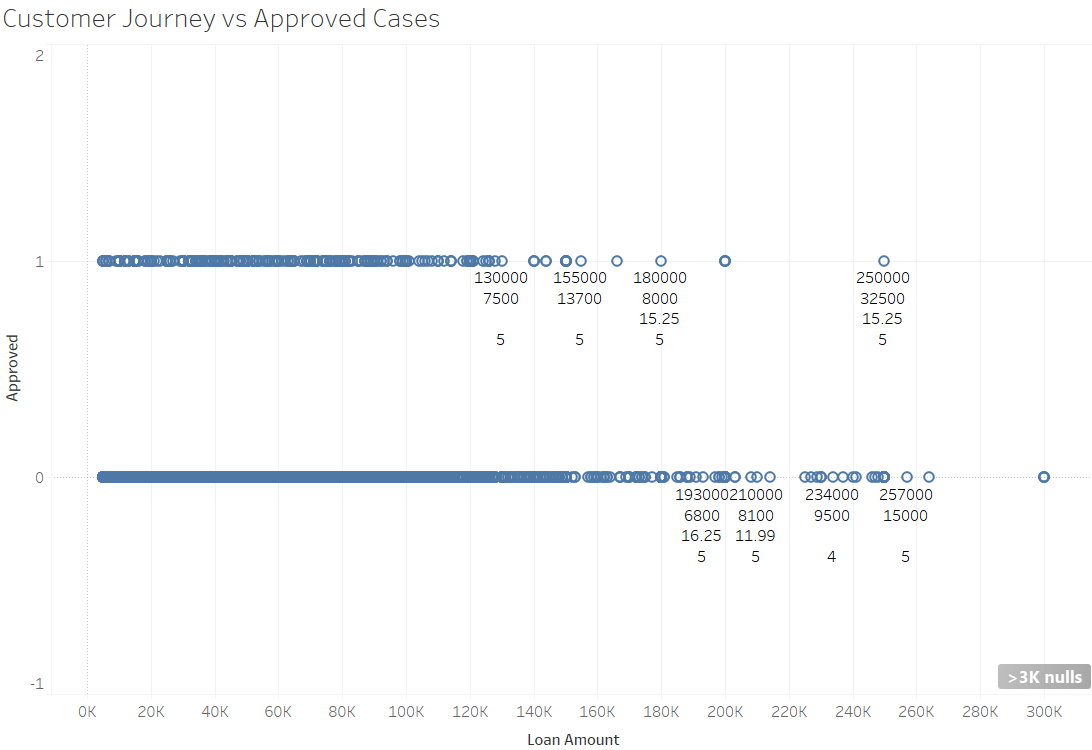

## Customer Journey: Triggering Features

In [120]:
# sns.pairplot(cleaned_train, hue='Approved', corner=True)

array([[<AxesSubplot:title={'center':'Employer_Category2'}>,
        <AxesSubplot:title={'center':'Monthly_Income'}>,
        <AxesSubplot:title={'center':'Existing_EMI'}>],
       [<AxesSubplot:title={'center':'Loan_Amount'}>,
        <AxesSubplot:title={'center':'Loan_Period'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>],
       [<AxesSubplot:title={'center':'EMI'}>,
        <AxesSubplot:title={'center':'Var1'}>,
        <AxesSubplot:title={'center':'Approved'}>]], dtype=object)

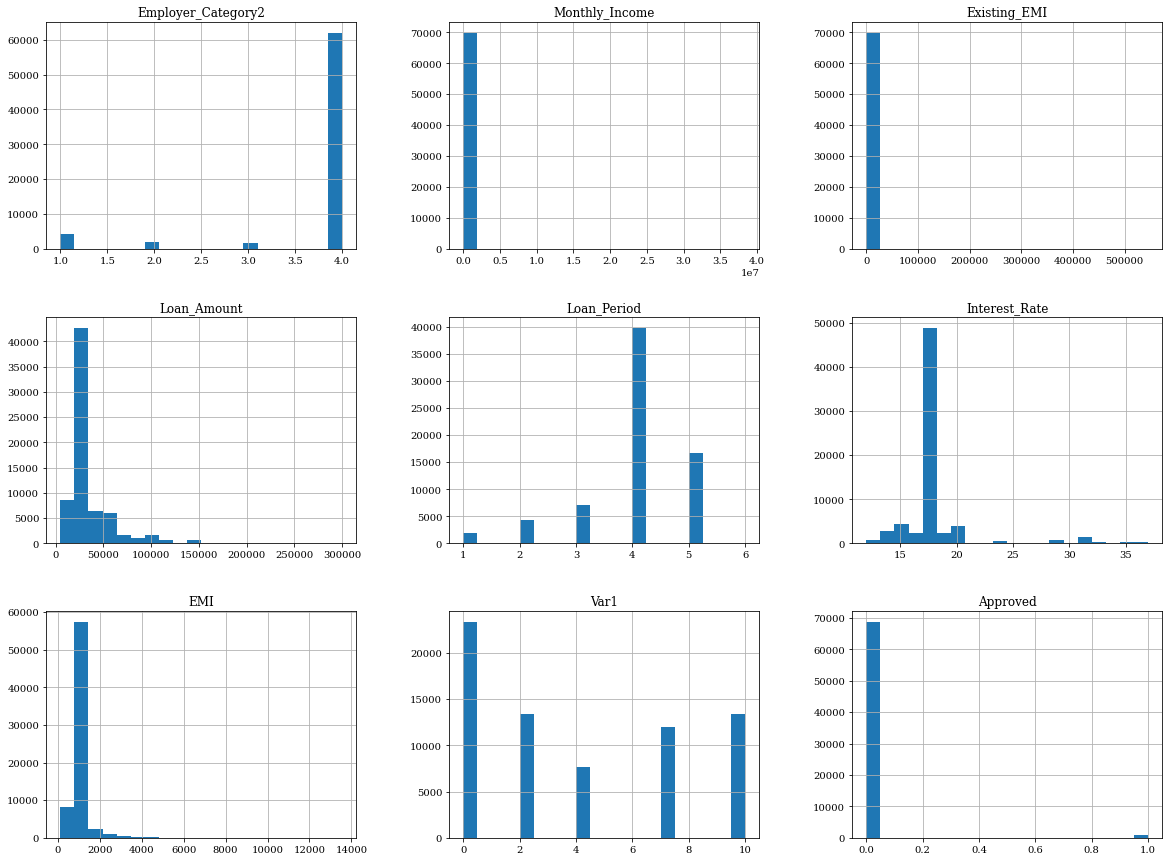

In [29]:
#pandas hist for feasible histogram analysis

num_bins = 20
cleaned_train.hist(bins = num_bins, figsize=(20,15))

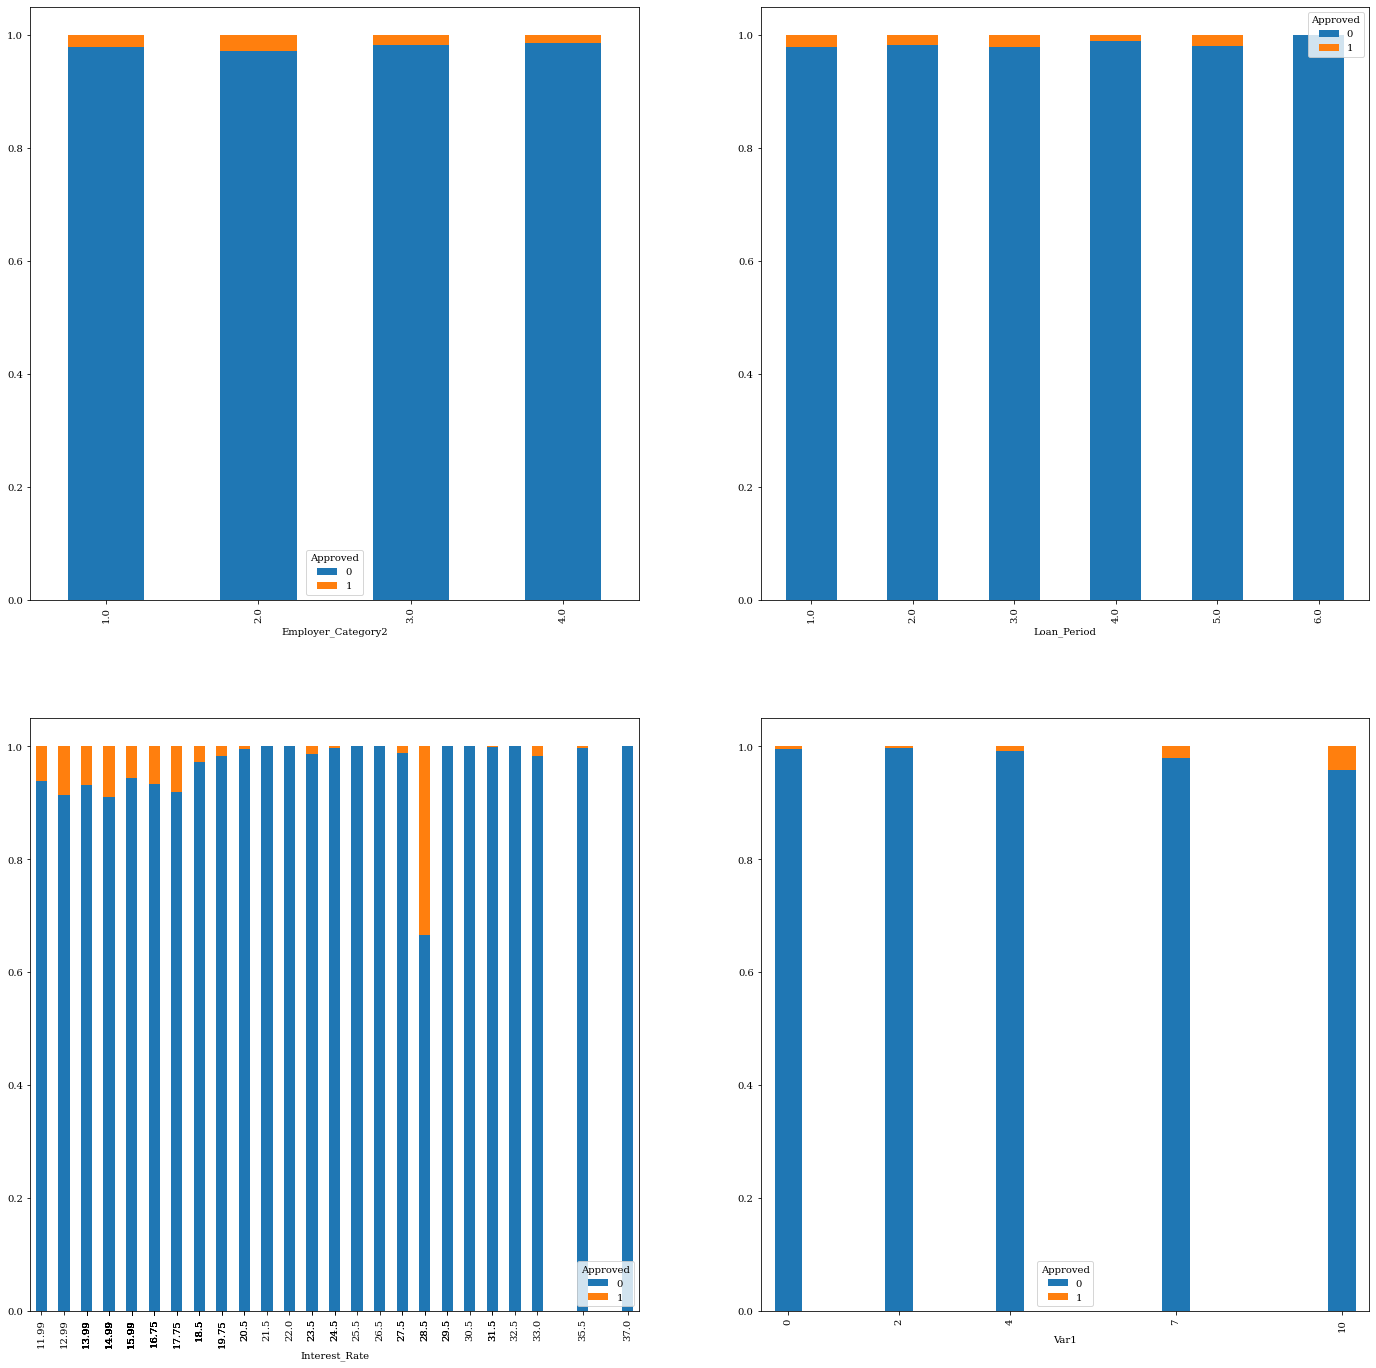

In [30]:
#Approved cases with reference to employer category, loan period, interest rate, var1 

cat1_col = ['Employer_Category2','Loan_Period','Interest_Rate','Var1']
fig, axes = plt.subplots(2, 2, figsize=(24, 24))        
for ax, c in zip(axes.ravel(), cat1_col):
#     cleaned_train[c].value_counts().plot.bar(ax=ax, title=c)
    cat=pd.crosstab(cleaned_train[c],cleaned_train['Approved'])
    cat.div(cat.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, ax=ax)

(0.97, 1.001)

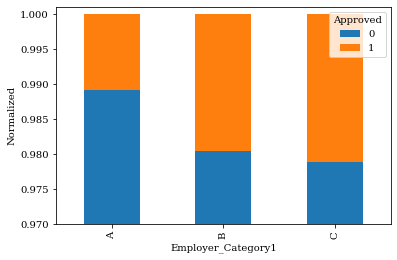

In [31]:

train=df_train.copy()
emp_bin=pd.crosstab(train['Employer_Category1'],train['Approved'])
emp_bin.div(emp_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Employer_Category1')
plt.ylabel('Normalized')
plt.ylim(0.97,1.001)

(0.945, 1.01)

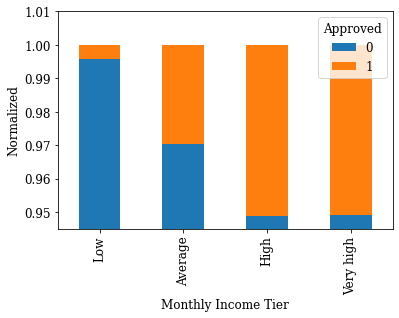

In [32]:
plt.rcParams.update({'font.size': 12})
bins=[0,3000,6000,9000,12000]
group=['Low','Average','High','Very high']
train=df_train.copy()
train['Income_bin']=pd.cut(train['Monthly_Income'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Approved'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Monthly Income Tier')
plt.ylabel('Normalized')
plt.ylim(0.945,1.01)

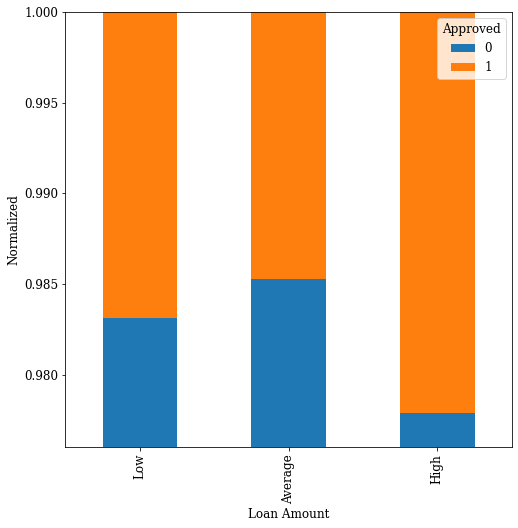

In [33]:
# df_train.describe()
bins=[0,20000,40000,60000]
group=['Low','Average','High']
train=df_train.copy()
train['Loan_Amount']=pd.cut(train['Loan_Amount'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Loan_Amount'],train['Approved'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(8,8))
plt.xlabel('Loan Amount')
plt.ylabel('Normalized')
plt.ylim(0.976,1)
plt.show()

(0.956, 1.001)

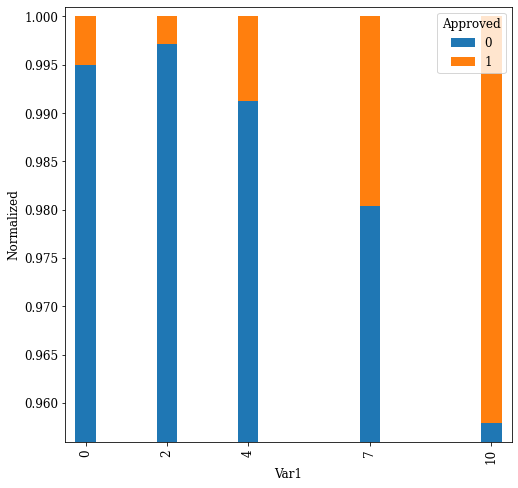

In [89]:

train=df_train.copy()
var_bin=pd.crosstab(train['Var1'],train['Approved'])
var_bin.div(var_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(8,8))
plt.xlabel('Var1')
plt.ylabel('Normalized')
plt.ylim(0.956,1.001)

In [35]:
# # Approved cases with reference to loan amount, monthly income, existing_EMI and EMI
# pyo.init_notebook_mode(connected = True)
# cat2_col = ['Monthly_Income','Existing_EMI','EMI']
# temp = cleaned_train.copy()
# # print(temp.head())
# temp['Loan_Amount'] = np.log(temp['Loan_Amount'])
# for c in cat2_col:
#     temp[c] = np.log(temp[c])
#     fig=px.scatter(temp, x='Loan_Amount',y=c,color="Approved")
#     fig.show()

In [33]:
#Encode categorical dataset
def encode(df):
    for col in df.columns:
        if df.loc[:,col].dtype==object:
            df.loc[:,col] = LabelEncoder().fit_transform(df.loc[:,col])
    return df
cleaned_train = encode(cleaned_train)        
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  int32  
 1   Gender                               69713 non-null  int32  
 2   DOB                                  69713 non-null  int32  
 3   Lead_Creation_Date                   69713 non-null  int32  
 4   City_Code                            69713 non-null  int32  
 5   City_Category                        69713 non-null  int32  
 6   Employer_Code                        69713 non-null  int32  
 7   Employer_Category1                   69713 non-null  int32  
 8   Employer_Category2                   69713 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  69713 non-null  int32  
 11  Primary_Bank_Type           

In [34]:
#Encode integrated categorical dataset
eco_train = encode(eco_train)        
eco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 0 to 69712
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  int32  
 1   Gender                               69713 non-null  int32  
 2   DOB                                  69713 non-null  int32  
 3   Lead_Creation_Date                   69713 non-null  int32  
 4   City_Code                            69713 non-null  int32  
 5   City_Category                        69713 non-null  int32  
 6   Employer_Code                        69713 non-null  int32  
 7   Employer_Category1                   69713 non-null  int32  
 8   Employer_Category2                   69713 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  69713 non-null  int32  
 11  Primary_Bank_Type           

<AxesSubplot:>

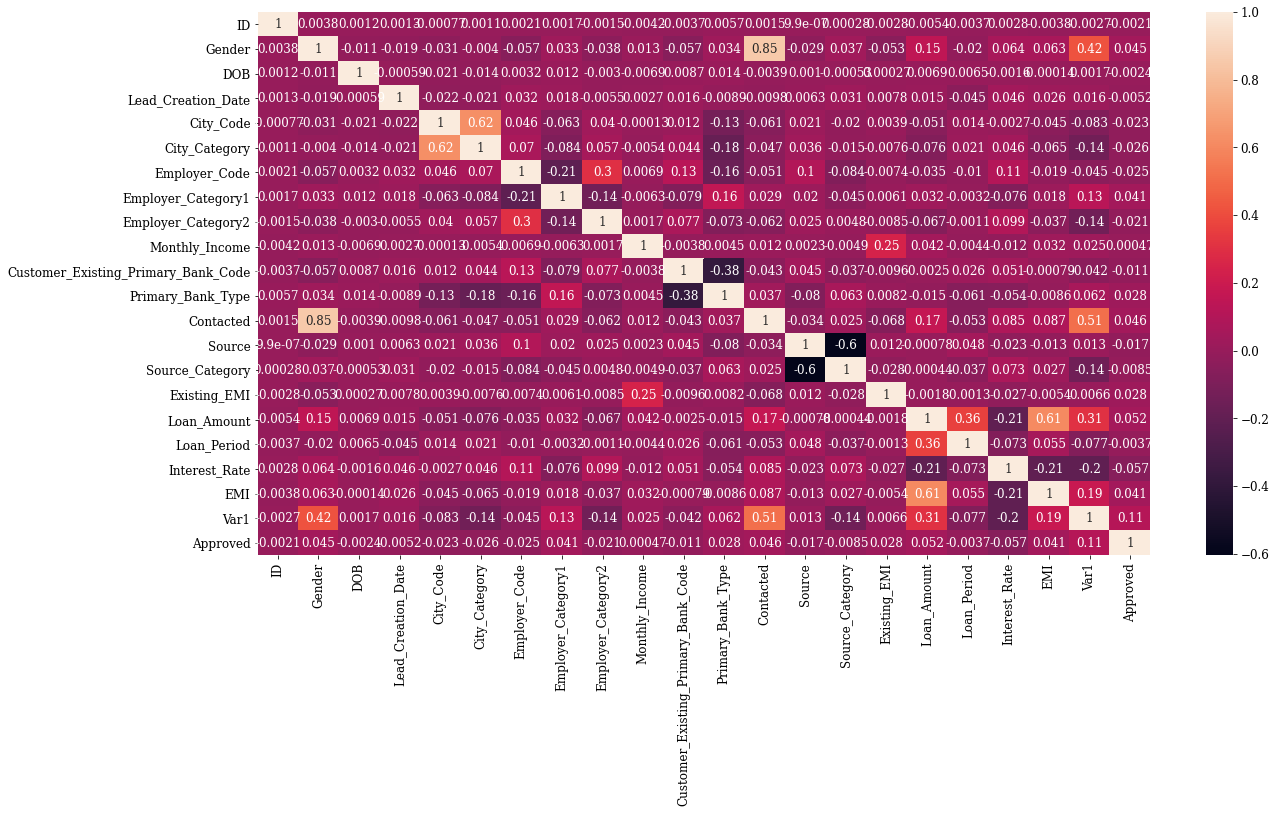

In [39]:
# Obtain the correlation matrix between encoded features
correlations = cleaned_train.corr()
f, ax = plt.subplots(figsize = (20, 10)) # fix the size
sns.heatmap(correlations, annot = True)

<AxesSubplot:>

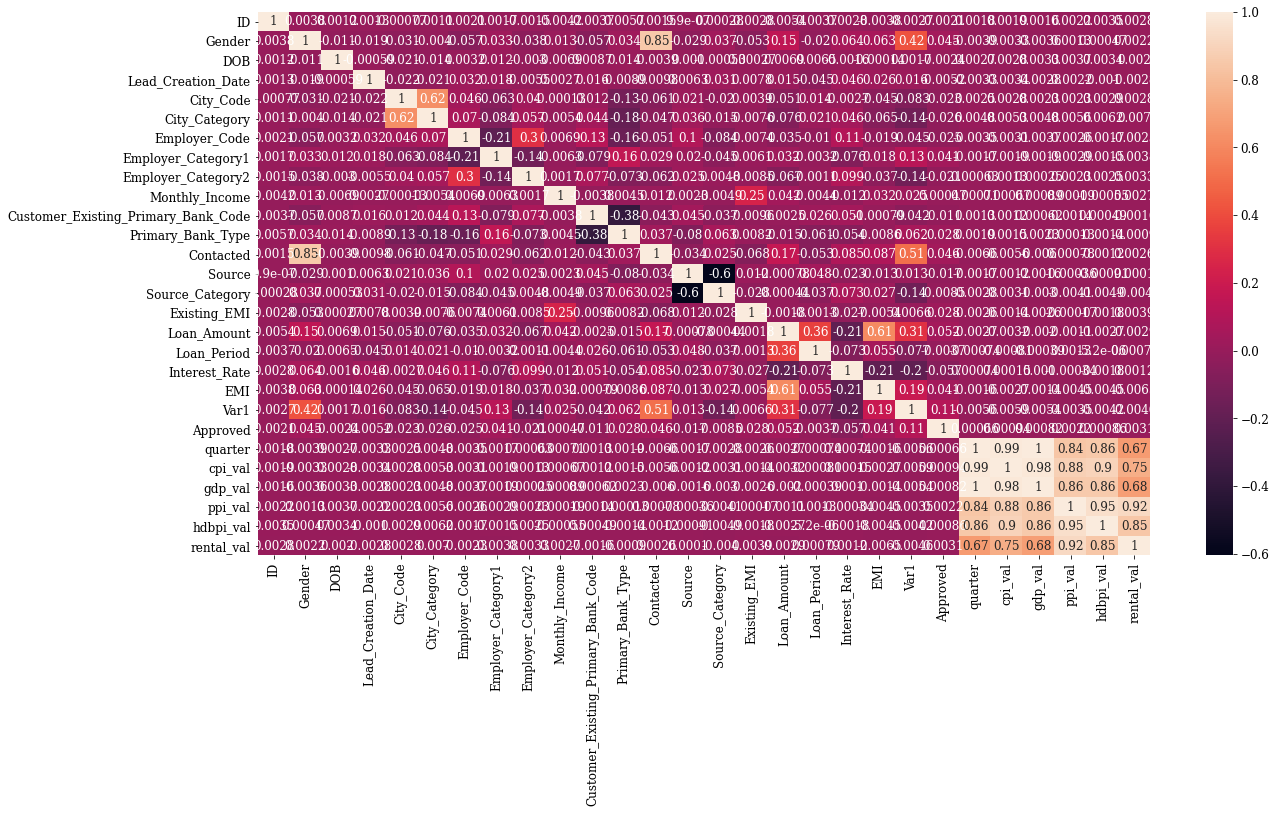

In [40]:
# Obtain the correlation matrix between integrated dataset features
correlationsC = eco_train.corr()
f, ax = plt.subplots(figsize = (20, 10)) # fix the size
sns.heatmap(correlationsC, annot = True)

In [35]:
# Normalize the dataset with standard scaler normalization techniques
scaler = StandardScaler()
cleaned_train.iloc[:,:-1] = scaler.fit_transform(cleaned_train.iloc[:,:-1])

In [36]:
# Normalize the integrated dataset with standard scaler normalization techniques
eco_train.loc[:,eco_train.columns != 'Approved'] = scaler.fit_transform(eco_train.loc[:,eco_train.columns != 'Approved'])

# Using imblearn oversample technique: SMOTE

In [37]:
# #Oversample minorities and balance the dataset
# #split into train test dataset

# X=cleaned_train.iloc[:,:-1]
# y=cleaned_train.iloc[:,-1]

# Xc = eco_train.loc[:,eco_train.columns != 'Approved']
# yc = eco_train.loc[:,eco_train.columns == 'Approved']

# X2, y2 = SMOTE(sampling_strategy=0.25).fit_resample(X, y)
# X5, y5 = SMOTE(sampling_strategy=1).fit_resample(X, y)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #no SMOT oversampling
# X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=42)#20% SMOT oversampling
# X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y5, test_size=0.2, random_state=42)#50% SMOT oversampling
# X_train5.shape, X_val5.shape

((109908, 21), (27478, 21))

In [44]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [38]:
#Oversample minorities by using random over sample methodology
#split into train test dataset
from imblearn.over_sampling import RandomOverSampler

X=cleaned_train.iloc[:,:-1]
y=cleaned_train.iloc[:,-1]

Xc = eco_train.loc[:,eco_train.columns != 'Approved']
yc = eco_train.loc[:,eco_train.columns == 'Approved']

X2, y2 = RandomOverSampler(sampling_strategy=0.25).fit_resample(X, y)
X5, y5 = RandomOverSampler(sampling_strategy=1).fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #no SMOT oversampling
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=42)#20% SMOT oversampling
X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y5, test_size=0.2, random_state=42)#50% SMOT oversampling
X_train5.shape, X_val5.shape

((109908, 21), (27478, 21))

In [28]:
#confirm the shape of integrate dataset without SMOT oversampling
Xc.shape,yc.shape

((69713, 27), (69713, 1))

## Build Neural Network Model for Loan Approval Classification

In [109]:
# Xa,ya = SMOTE(sampling_strategy=50/50.0).fit_resample(X, y)
Xa,ya = RandomOverSampler(sampling_strategy=50/50.0).fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(Xa, ya, test_size=0.2, random_state=42)

In [120]:
y_train.shape

(109908,)

In [121]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
# define the keras model
ann = Sequential()
ann.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='relu'))

In [122]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                352       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [123]:
#implement callbacks for early stoping
callbacks = [EarlyStopping(monitor='accuracy', patience=20),
             ModelCheckpoint(filepath='ann.h5', monitor='accuracy', save_best_only=True)]
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
ann.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [124]:
history=ann.fit(X_train, y_train, epochs=200, batch_size=len(X_train)//5000, callbacks=callbacks, validation_data = (X_val,y_val))

Epoch 1/200
5234/5234 [==============================] - 12s 2ms/step - loss: 0.6222 - accuracy: 0.7156 - val_loss: 0.5813 - val_accuracy: 0.7153
Epoch 2/200
5234/5234 [==============================] - 14s 3ms/step - loss: 0.5234 - accuracy: 0.7475 - val_loss: 0.4885 - val_accuracy: 0.7630
Epoch 3/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.5041 - accuracy: 0.7620 - val_loss: 0.4587 - val_accuracy: 0.7691
Epoch 4/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.4785 - accuracy: 0.7785 - val_loss: 0.4678 - val_accuracy: 0.7748
Epoch 5/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.4510 - accuracy: 0.7974 - val_loss: 0.4266 - val_accuracy: 0.8064
Epoch 6/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.4314 - accuracy: 0.8147 - val_loss: 0.4122 - val_accuracy: 0.8295
Epoch 7/200
5234/5234 [==============================] - 13s 3ms/step - loss: 0.4271 - accuracy: 0.8329 - val_loss: 0.4509 -

Epoch 57/200
5234/5234 [==============================] - 12s 2ms/step - loss: 0.3589 - accuracy: 0.9110 - val_loss: 0.3968 - val_accuracy: 0.8971
Epoch 58/200
5234/5234 [==============================] - 12s 2ms/step - loss: 0.4226 - accuracy: 0.9017 - val_loss: 0.4613 - val_accuracy: 0.8902
Epoch 59/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.4019 - accuracy: 0.9088 - val_loss: 0.4426 - val_accuracy: 0.8957
Epoch 60/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.4149 - accuracy: 0.9012 - val_loss: 0.3640 - val_accuracy: 0.9105
Epoch 61/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3443 - accuracy: 0.9142 - val_loss: 0.3297 - val_accuracy: 0.9072
Epoch 62/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3933 - accuracy: 0.9014 - val_loss: 0.3663 - val_accuracy: 0.8975
Epoch 63/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3421 - accuracy: 0.9113 - val_loss: 0

5234/5234 [==============================] - 12s 2ms/step - loss: 0.3534 - accuracy: 0.9321 - val_loss: 0.3354 - val_accuracy: 0.9321
Epoch 168/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3836 - accuracy: 0.9296 - val_loss: 0.4308 - val_accuracy: 0.9194
Epoch 169/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3949 - accuracy: 0.9310 - val_loss: 0.3494 - val_accuracy: 0.9343
Epoch 170/200
5234/5234 [==============================] - 12s 2ms/step - loss: 0.3402 - accuracy: 0.9357 - val_loss: 0.3160 - val_accuracy: 0.9400
Epoch 171/200
5234/5234 [==============================] - 12s 2ms/step - loss: 0.3044 - accuracy: 0.9394 - val_loss: 0.3265 - val_accuracy: 0.9380
Epoch 172/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3068 - accuracy: 0.9392 - val_loss: 0.3743 - val_accuracy: 0.9227
Epoch 173/200
5234/5234 [==============================] - 13s 2ms/step - loss: 0.3312 - accuracy: 0.9357 - val_loss: 0.3306 -

In [125]:
# annmodel=KerasClassifier(build_fn=lambda:ann, epochs=200, batch_size=len(X_train)//2000, callbacks=callbacks, validation_data = (X_val,y_val))
# history=ann.fit(x=X_train, y=y_train)

In [126]:
ann.save('ann_50.h5')

# ann = tensorflow.keras.models.load_model('ann_50.h5')

In [45]:
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=ann, epochs=100)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=3, shuffle=True)
# results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
# # results = cross_val_score(pipeline, X_train, y_train)
# print(f"Valuation Score: {results.mean()*100:.2f}% std {results.std()*100:.2f}")

In [52]:
# # fit the keras model on the dataset
# history = ann.fit(X_train, y_train, epochs=100, callbacks=callbacks, validation_data = (X_val,y_val))

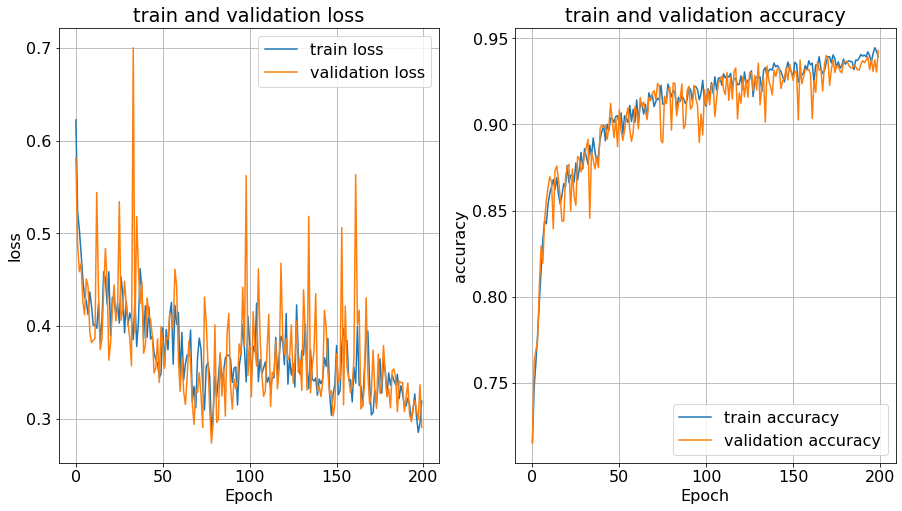

In [127]:

def plot_curves():
    fig, axes = plt.subplots(figsize=(15,8),nrows=1, ncols=2)
    # plot training and validation losses
    axes[0].set_title('train and validation loss')
    axes[0].plot(history.history['loss'],  label='train loss')
    axes[0].plot(history.history['val_loss'], label='validation loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('loss')
    axes[0].grid()
    axes[0].legend()
    #plot training and validation mae
    axes[1].set_title('train and validation accuracy')
    axes[1].plot(history.history['accuracy'],  label='train accuracy')
    axes[1].plot(history.history['val_accuracy'], label='validation accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('accuracy')
    axes[1].grid()
    axes[1].legend()
    return

plot_curves()

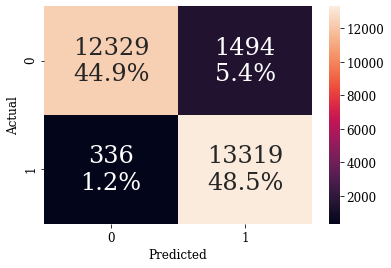

In [66]:
cm_test = metrics.confusion_matrix(y_val, annmodel.predict(X_val), labels=[0,1])
group_counts = [f'{value:d}' for value in cm_test.flatten()]
group_percentages = [f'{value:.1%}' for value in cm_test.flatten()/np.sum(cm_test)]
labels = [f'{v1}\n{v2}'for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
s=sns.heatmap(cm_test, annot=labels,annot_kws={"size": 24},fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
annfeature = pd.concat([pd.Series(X_train.columns),pd.Series(r.importances_mean)], axis=1)
imp_feature['ANN'] = annfeature.sort_values(by = 1, axis=0,ascending = False).iloc[:,0].tolist()
imp_feature

In [176]:
import shap
explainer = shap.KernelExplainer(ann.predict,X_train)
X_sample = shap.sample(X_val, 30)
shap_values = explainer.shap_values(X_sample,nsamples=30)

Using 109908 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=4.419e-04, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 14 iterations, alpha=3.881e-04, previous alpha=3.305e-04, with an active set of 13 regressors.
Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=1.397e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=6.987e-05, with an active set of 14 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 

Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=8.613e-05, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=8.414e-05, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=2.980e-05, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=2.510e-05, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dro

Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.586e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=2.293e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 14 iterations, alpha=1.038e-03, previous alpha=1.010e-03, with an active set of 11 regressors.
Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=9.936e-04, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current v

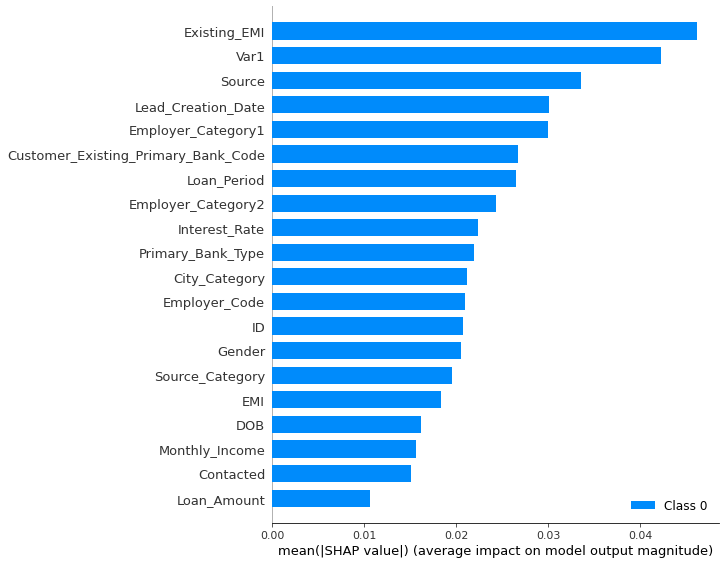

In [177]:
shap.summary_plot(shap_values, X_train)

In [178]:
shap_values[0][0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2259787 , 0.        ,
       0.        , 0.        , 0.        , 0.21386906, 0.        ,
       0.        ])

In [193]:
shap.initjs()
# for i in range(10):
i=14
shap.force_plot(explainer.expected_value, shap_values[0][i,:] ,X_sample.iloc[i,:],feature_names=X_sample.columns.tolist())